In [1]:
import pandas as pd

# Load the dataset
file_path = 'bike_sales_india.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    10000 non-null  object 
 1   Avg Daily Distance (km)  10000 non-null  float64
 2   Brand                    10000 non-null  object 
 3   Model                    10000 non-null  object 
 4   Price (INR)              10000 non-null  int64  
 5   Year of Manufacture      10000 non-null  int64  
 6   Engine Capacity (cc)     10000 non-null  int64  
 7   Fuel Type                10000 non-null  object 
 8   Mileage (km/l)           10000 non-null  float64
 9   Owner Type               10000 non-null  object 
 10  Registration Year        10000 non-null  int64  
 11  Insurance Status         10000 non-null  object 
 12  Seller Type              10000 non-null  object 
 13  Resale Price (INR)       10000 non-null  float64
 14  City Tier              

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3


In [3]:
# Function to train and evaluate optimized regression models
def optimized_regression_model(X_train, X_test, y_train, y_test):
    models = {
        'Random Forest Regressor': RandomForestRegressor(random_state=42),
        'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'R2': r2_score(y_test, y_pred)
        }
    return results

# Train and evaluate for Resale Price Prediction
resale_price_results = optimized_regression_model(X_train, X_test, y_train_resale, y_test_resale)

resale_price_results


{'Random Forest Regressor': {'MAE': 56102.38964565,
  'MSE': 4597330641.711671,
  'R2': -0.04669623104783849},
 'Gradient Boosting Regressor': {'MAE': 55473.6045134995,
  'MSE': 4465011938.336615,
  'R2': -0.016570599694892385}}

In [4]:
# Train and evaluate for Mileage Prediction
mileage_results = optimized_regression_model(X_train, X_test, y_train_mileage, y_test_mileage)

mileage_results


{'Random Forest Regressor': {'MAE': 18.102355,
  'MSE': 461.52945331645003,
  'R2': -0.050938691793638524},
 'Gradient Boosting Regressor': {'MAE': 17.744920991376144,
  'MSE': 442.64084973582857,
  'R2': -0.007927862919806739}}

In [5]:
# Function to train and evaluate optimized classification models
def optimized_classification_model(X_train, X_test, y_train, y_test):
    models = {
        'Random Forest Classifier': RandomForestClassifier(random_state=42),
        'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42)
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1 Score': f1_score(y_test, y_pred, average='weighted')
        }
    return results

# Train and evaluate for Insurance Status Prediction
insurance_status_results = optimized_classification_model(X_train, X_test, y_train_insurance, y_test_insurance)

insurance_status_results


{'Random Forest Classifier': {'Accuracy': 0.346,
  'Precision': 0.34660046334130246,
  'Recall': 0.346,
  'F1 Score': 0.34512808306138204},
 'Gradient Boosting Classifier': {'Accuracy': 0.348,
  'Precision': 0.3472355737736571,
  'Recall': 0.348,
  'F1 Score': 0.34383923649365794}}

In [6]:
# Train and evaluate for Price Category Prediction
price_category_results = optimized_classification_model(X_train, X_test, y_train_price_cat, y_test_price_cat)

price_category_results


{'Random Forest Classifier': {'Accuracy': 0.3265,
  'Precision': 0.3261840927993964,
  'Recall': 0.3265,
  'F1 Score': 0.326142266152108},
 'Gradient Boosting Classifier': {'Accuracy': 0.322,
  'Precision': 0.3241011909511586,
  'Recall': 0.322,
  'F1 Score': 0.3219274996439702}}

In [7]:
# Train and evaluate for Brand Prediction
brand_results = optimized_classification_model(X_train, X_test, y_train_brand, y_test_brand)

brand_results


{'Random Forest Classifier': {'Accuracy': 0.9445,
  'Precision': 0.9459303357864354,
  'Recall': 0.9445,
  'F1 Score': 0.9447006673283013},
 'Gradient Boosting Classifier': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1 Score': 1.0}}

In [8]:
# Train and evaluate for Fuel Type Prediction
fuel_type_results = optimized_classification_model(X_train, X_test, y_train_fuel, y_test_fuel)

fuel_type_results


{'Random Forest Classifier': {'Accuracy': 0.331,
  'Precision': 0.33171301429279576,
  'Recall': 0.331,
  'F1 Score': 0.33073046627289954},
 'Gradient Boosting Classifier': {'Accuracy': 0.3415,
  'Precision': 0.34262487061162356,
  'Recall': 0.3415,
  'F1 Score': 0.3385224127485912}}

In [10]:
# Correcting the column name for price
df['Price Num'] = df['Price (INR)'].replace('[\₹,]', '', regex=True).astype(float)

# Creating interaction features
df['Age'] = 2025 - df['Year of Manufacture']
df['Age_Price_Interaction'] = df['Age'] * df['Price Num']
df['Mileage_Age_Interaction'] = df['Mileage (km/l)'] * df['Age']

# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Brand', 'Fuel Type', 'City Tier', 'Seller Type', 'Owner Type'], drop_first=True)

# Splitting features and targets again
X = df_encoded.drop(columns=['Resale Price (INR)', 'Mileage (km/l)', 'Insurance Status'])
y_resale = df['Resale Price (INR)']
y_mileage = df['Mileage (km/l)']
y_insurance = df['Insurance Status']
y_price_cat = pd.qcut(df['Price Num'], q=3, labels=['Low', 'Mid', 'High'])
y_brand = df['Brand']
y_fuel = df['Fuel Type']

# Splitting the data
X_train, X_test, y_train_resale, y_test_resale = train_test_split(X, y_resale, test_size=0.2, random_state=42)
X_train, X_test, y_train_mileage, y_test_mileage = train_test_split(X, y_mileage, test_size=0.2, random_state=42)
X_train, X_test, y_train_insurance, y_test_insurance = train_test_split(X, y_insurance, test_size=0.2, random_state=42)
X_train, X_test, y_train_price_cat, y_test_price_cat = train_test_split(X, y_price_cat, test_size=0.2, random_state=42)
X_train, X_test, y_train_brand, y_test_brand = train_test_split(X, y_brand, test_size=0.2, random_state=42)
X_train, X_test, y_train_fuel, y_test_fuel = train_test_split(X, y_fuel, test_size=0.2, random_state=42)

# Verifying the feature engineering step
X_train.head()


,State,Avg Daily Distance (km),Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Registration Year,Price Num,Age,Age_Price_Interaction,...,Brand_TVS,Brand_Yamaha,Fuel Type_Hybrid,Fuel Type_Petrol,City Tier_Tier 1,City Tier_Tier 2,City Tier_Tier 3,Seller Type_Individual,Owner Type_Second,Owner Type_Third
9254,West Bengal,19.45,Duke 200,237128,2016,307,2022,237128.0,9,2134152.0,...,False,False,False,False,False,True,False,True,False,True
1561,Tamil Nadu,15.30,Classic 350,378221,2017,172,2021,378221.0,8,3025768.0,...,False,False,False,True,False,False,True,False,False,True
1670,Maharashtra,59.41,Ray ZR,137593,2024,196,2024,137593.0,1,137593.0,...,False,True,True,False,False,True,False,False,True,False
6087,Rajasthan,19.00,Meteor 350,344022,2016,982,2022,344022.0,9,3096198.0,...,False,False,False,False,False,False,False,False,True,False
6669,Delhi,10.09,FZ V3,361981,2015,368,2015,361981.0,10,3619810.0,...,False,True,True,False,False,False,True,True,False,False


In [19]:
# 4. Predicting Price Category using Random Forest and Gradient Boosting Classifiers

# Random Forest Classifier for Price Category
rf_price_cat = RandomForestClassifier(random_state=42)
rf_price_cat.fit(X_train, y_train_price_cat)
y_pred_price_cat_rf = rf_price_cat.predict(X_test)

# Gradient Boosting Classifier for Price Category
gb_price_cat = GradientBoostingClassifier(random_state=42)
gb_price_cat.fit(X_train, y_train_price_cat)
y_pred_price_cat_gb = gb_price_cat.predict(X_test)

# Evaluation Metrics for Price Category
price_cat_metrics = {
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_score(y_test_price_cat, y_pred_price_cat_rf), 
                 accuracy_score(y_test_price_cat, y_pred_price_cat_gb)],
    'Precision': [precision_score(y_test_price_cat, y_pred_price_cat_rf, average='weighted'), 
                  precision_score(y_test_price_cat, y_pred_price_cat_gb, average='weighted')],
    'Recall': [recall_score(y_test_price_cat, y_pred_price_cat_rf, average='weighted'), 
               recall_score(y_test_price_cat, y_pred_price_cat_gb, average='weighted')],
    'F1 Score': [f1_score(y_test_price_cat, y_pred_price_cat_rf, average='weighted'), 
                 f1_score(y_test_price_cat, y_pred_price_cat_gb, average='weighted')]
}

# Displaying the evaluation metrics for Price Category
pd.DataFrame(price_cat_metrics)


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,1.0,1.0,1.0,1.0
1,Gradient Boosting,1.0,1.0,1.0,1.0


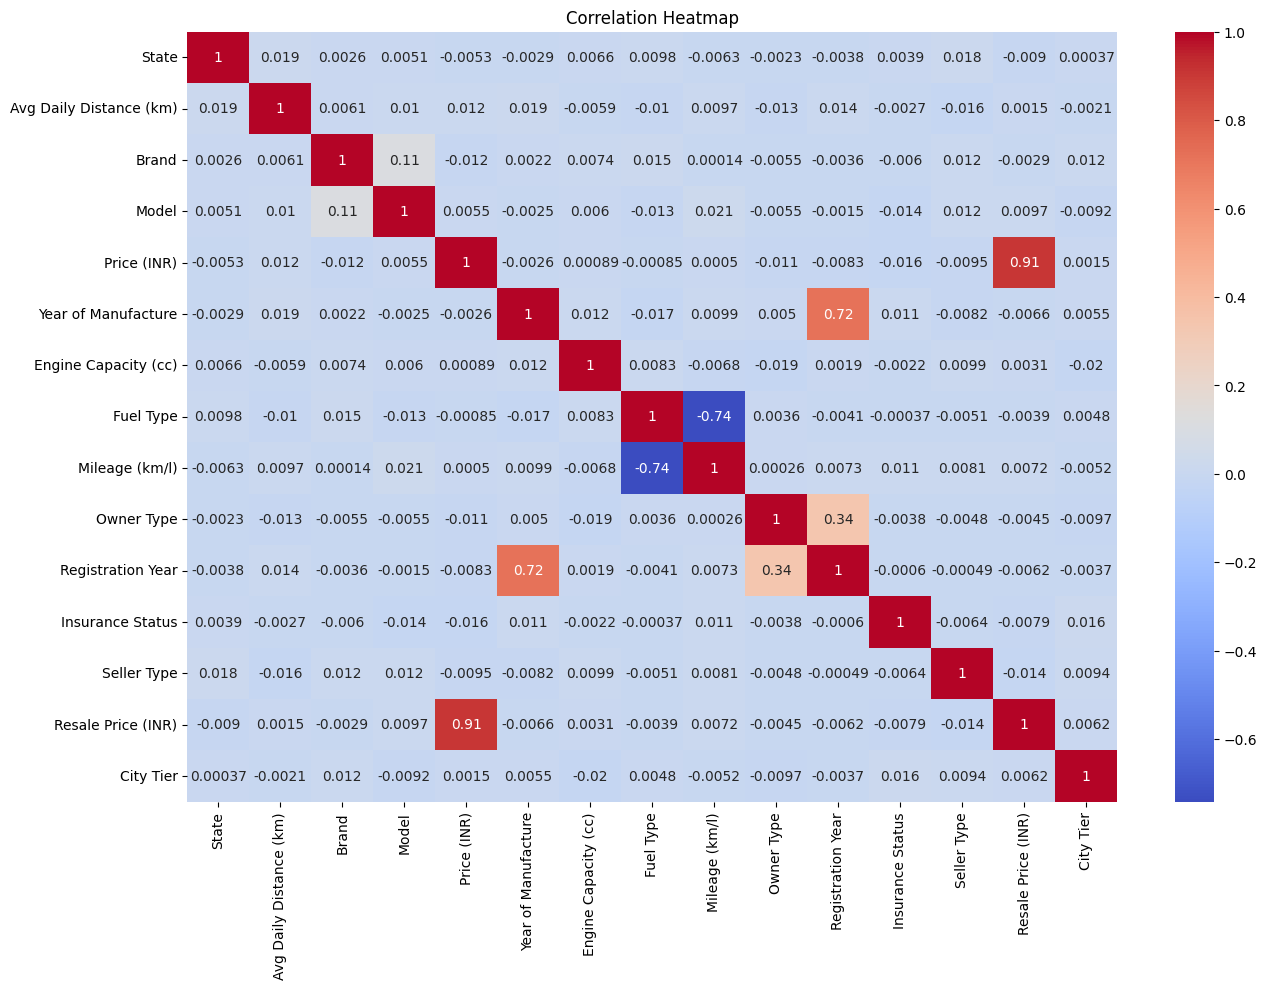

In [21]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('bike_sales_india.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Correlation Heatmap
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [23]:
print(df.columns)

Index(['State', 'Avg Daily Distance (km)', 'Brand', 'Model', 'Price (INR)',
       'Year of Manufacture', 'Engine Capacity (cc)', 'Fuel Type',
       'Mileage (km/l)', 'Owner Type', 'Registration Year', 'Insurance Status',
       'Seller Type', 'Resale Price (INR)', 'City Tier'],
      dtype='object')


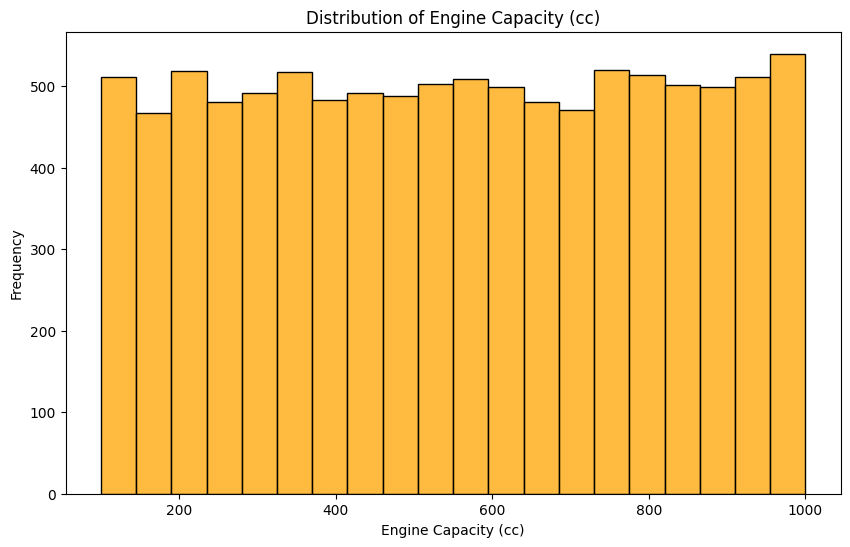

In [42]:
# Histogram for Engine Capacity
plt.figure(figsize=(10, 6))
sns.histplot(df['Engine Capacity (cc)'], bins=20, color='orange')
plt.title('Distribution of Engine Capacity (cc)')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Frequency')
plt.show()


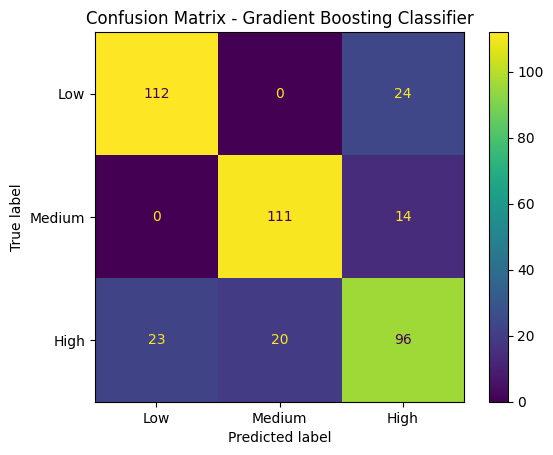

In [49]:
# Binning the Price (INR) column into categories
df_sample['Price_Category'] = pd.qcut(df_sample['Price (INR)'], q=3, labels=['Low', 'Medium', 'High'])

# Splitting data into features and target variable
X = df_sample.drop(columns=['Price (INR)', 'Price_Category'])
y = df_sample['Price_Category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model with optimized parameters
gb = GradientBoostingClassifier(n_estimators=50, max_depth=2, random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred = gb.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()
